In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from my_utils.my_utils import printMD

In [5]:
degree_of_rotation = -2.2
file = uproot.open("root_files/gopa4+100-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()
w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T
w_markers = w_new[152:225, 45:119]
w_left  = w_markers[30:40, :32]
w_right = w_markers[21:31, 24:]
print(f"left: {w_left.shape}, right: {w_right.shape}")

left: (10, 32), right: (10, 50)


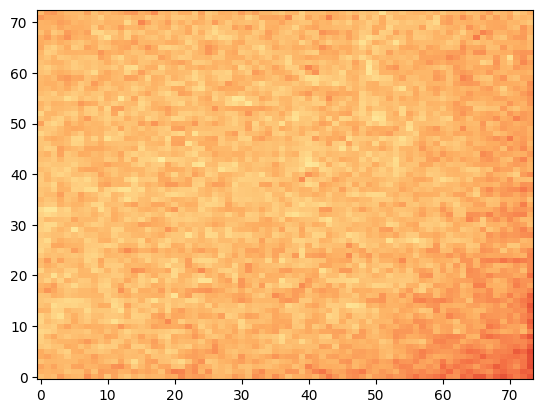

In [6]:
w_cm = w_markers
y_cm = range(w_cm.shape[0])   # Rows      (this, _)
x_cm = range(w_cm.shape[1])   # Columns   (_, this)
plt.pcolormesh(x_cm, y_cm, w_cm, cmap="RdYlBu", vmin=200, vmax=400)
# plt.grid()
plt.show()

### **Left Marker**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


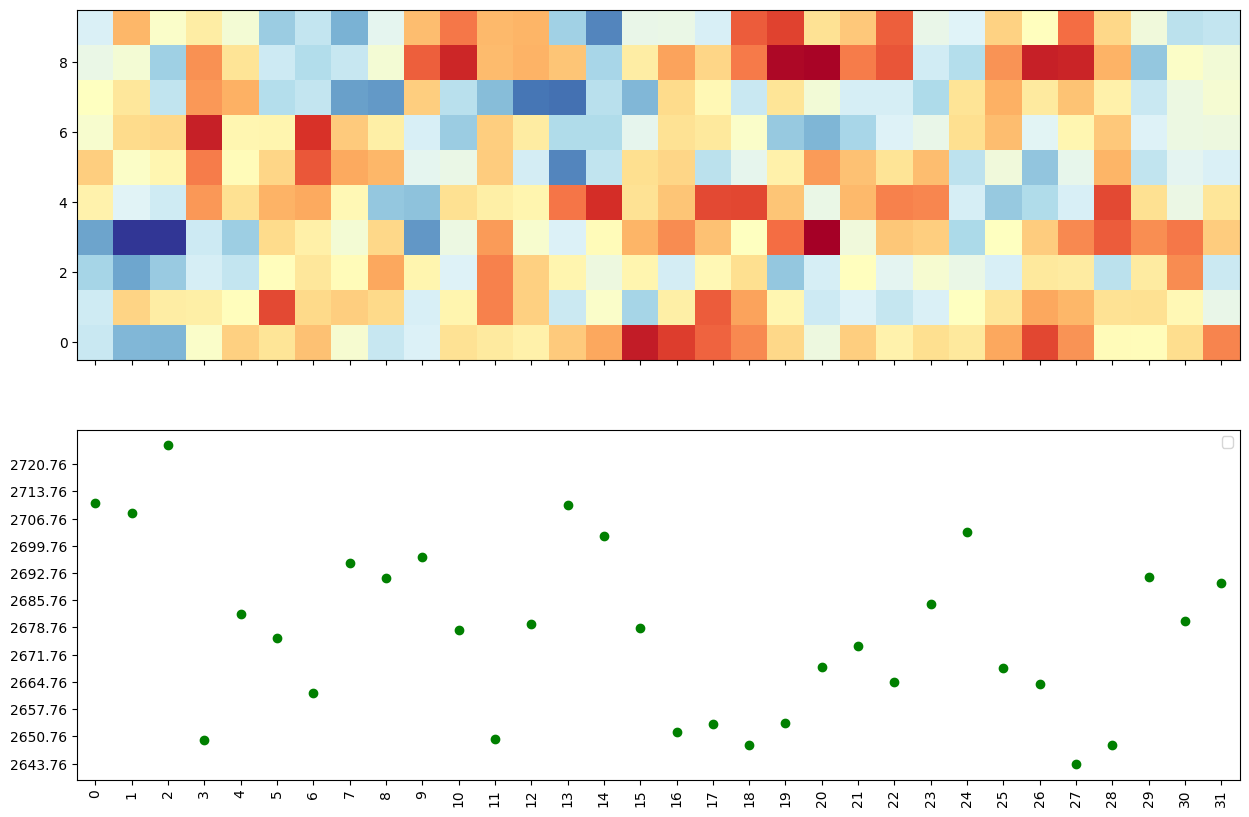

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

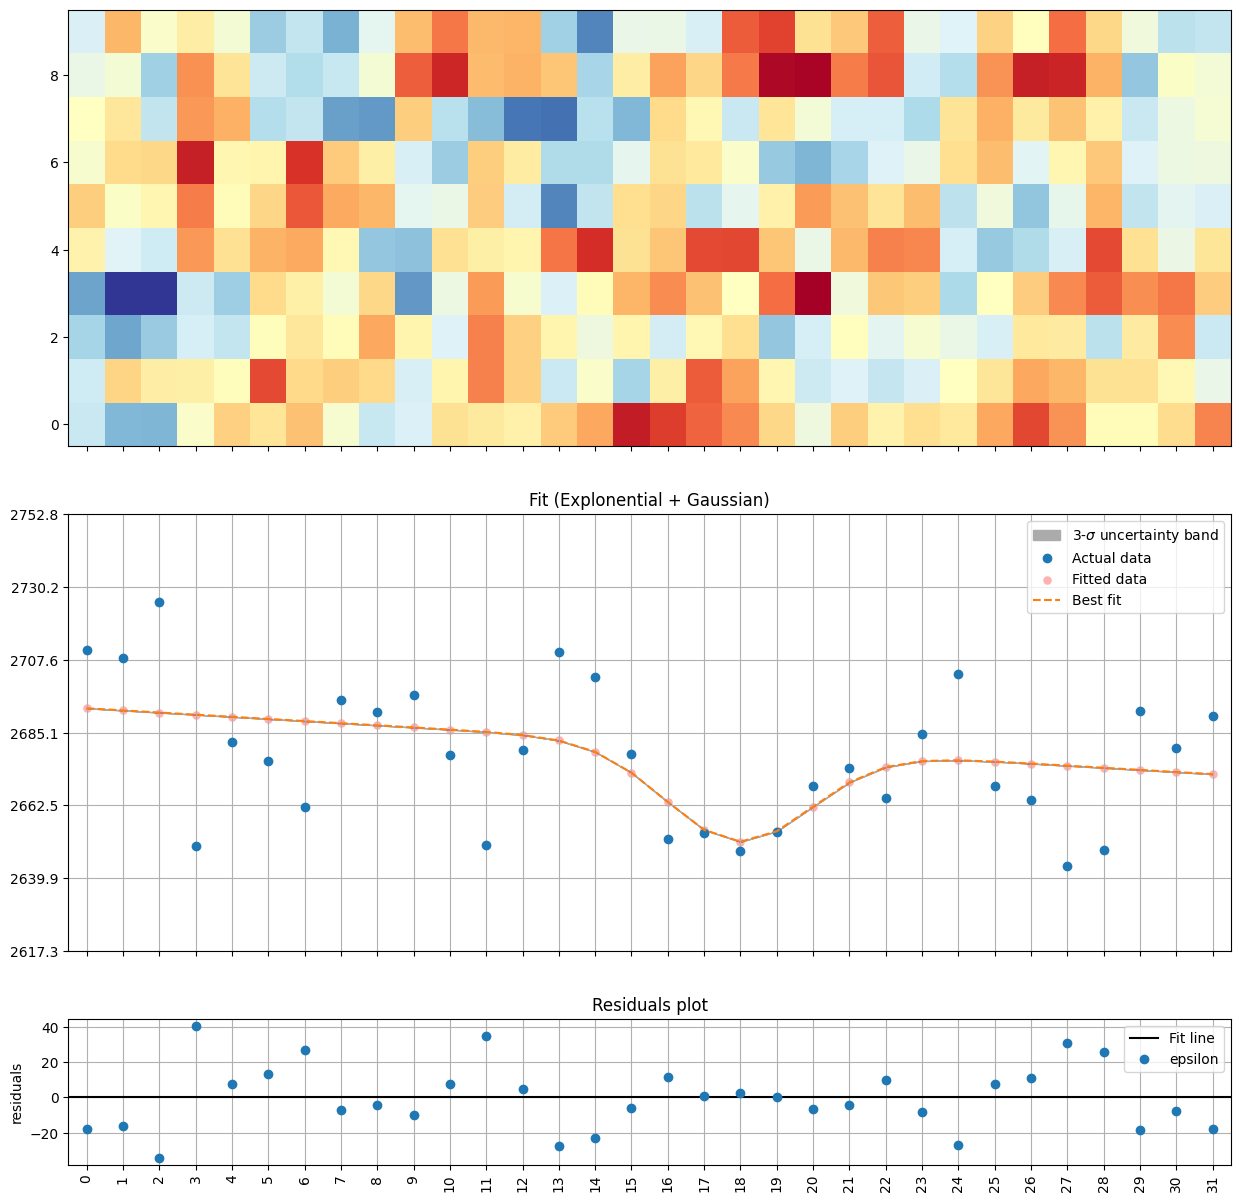

name,value,initial value,min,max,vary,expression
exp_amplitude,2692.61888,2689.9165883517658,-inf,inf,True,
exp_decay,4069.54743,3398.549969289873,-inf,inf,True,
g1_amplitude,-148.052263,1.0,-inf,inf,True,
g1_center,17.9329759,17,14.0000000,20.0000000,True,
g1_sigma,2.00000000,4,2.00000000,inf,True,
g1_fwhm,4.70964000,9.41928,-inf,inf,False,2.3548200*g1_sigma
g1_height,-29.5321551,0.099735575,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [8]:
from lmfit.models import GaussianModel, ExponentialModel

# Data
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=17, min=14, max=20)
pars['g1_sigma'].set(value=4, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Graphing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band')
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend()

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'])

plt.show()

out.params

### **Right Marker**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


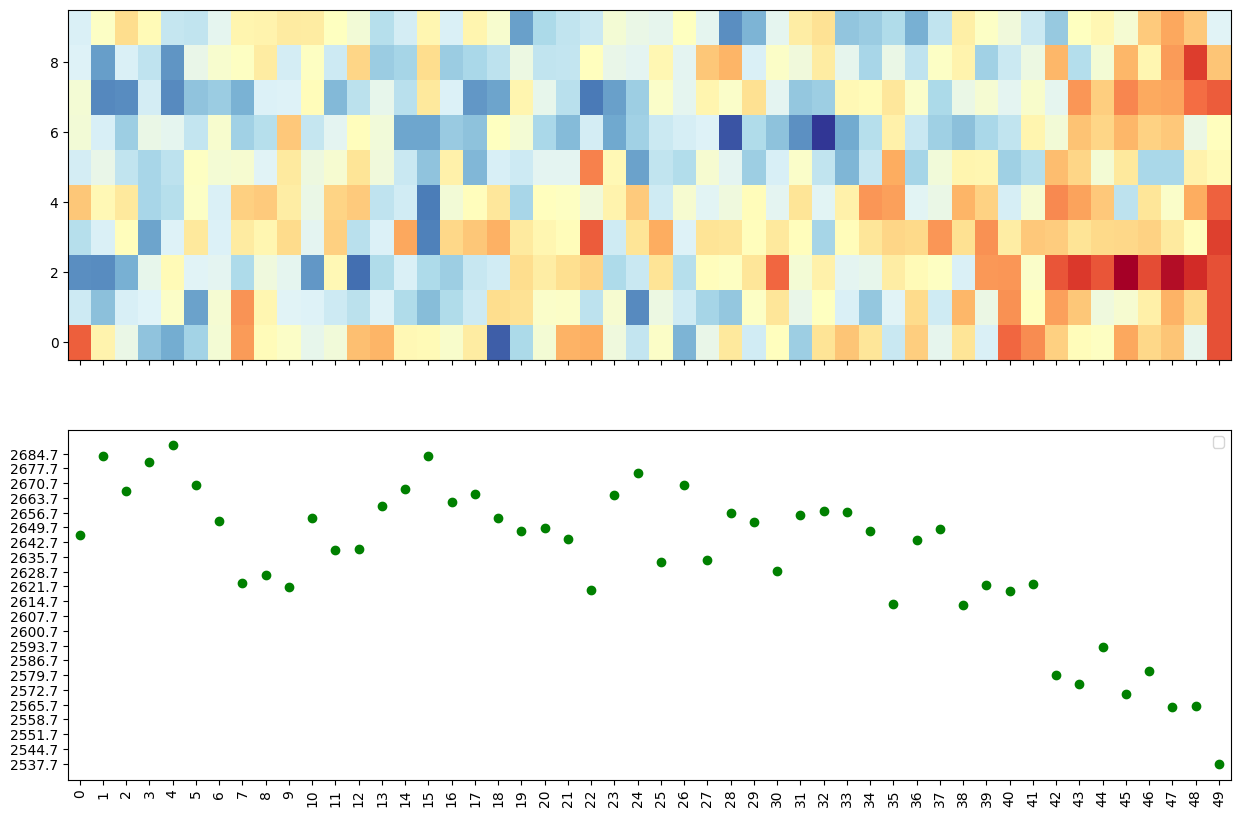

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

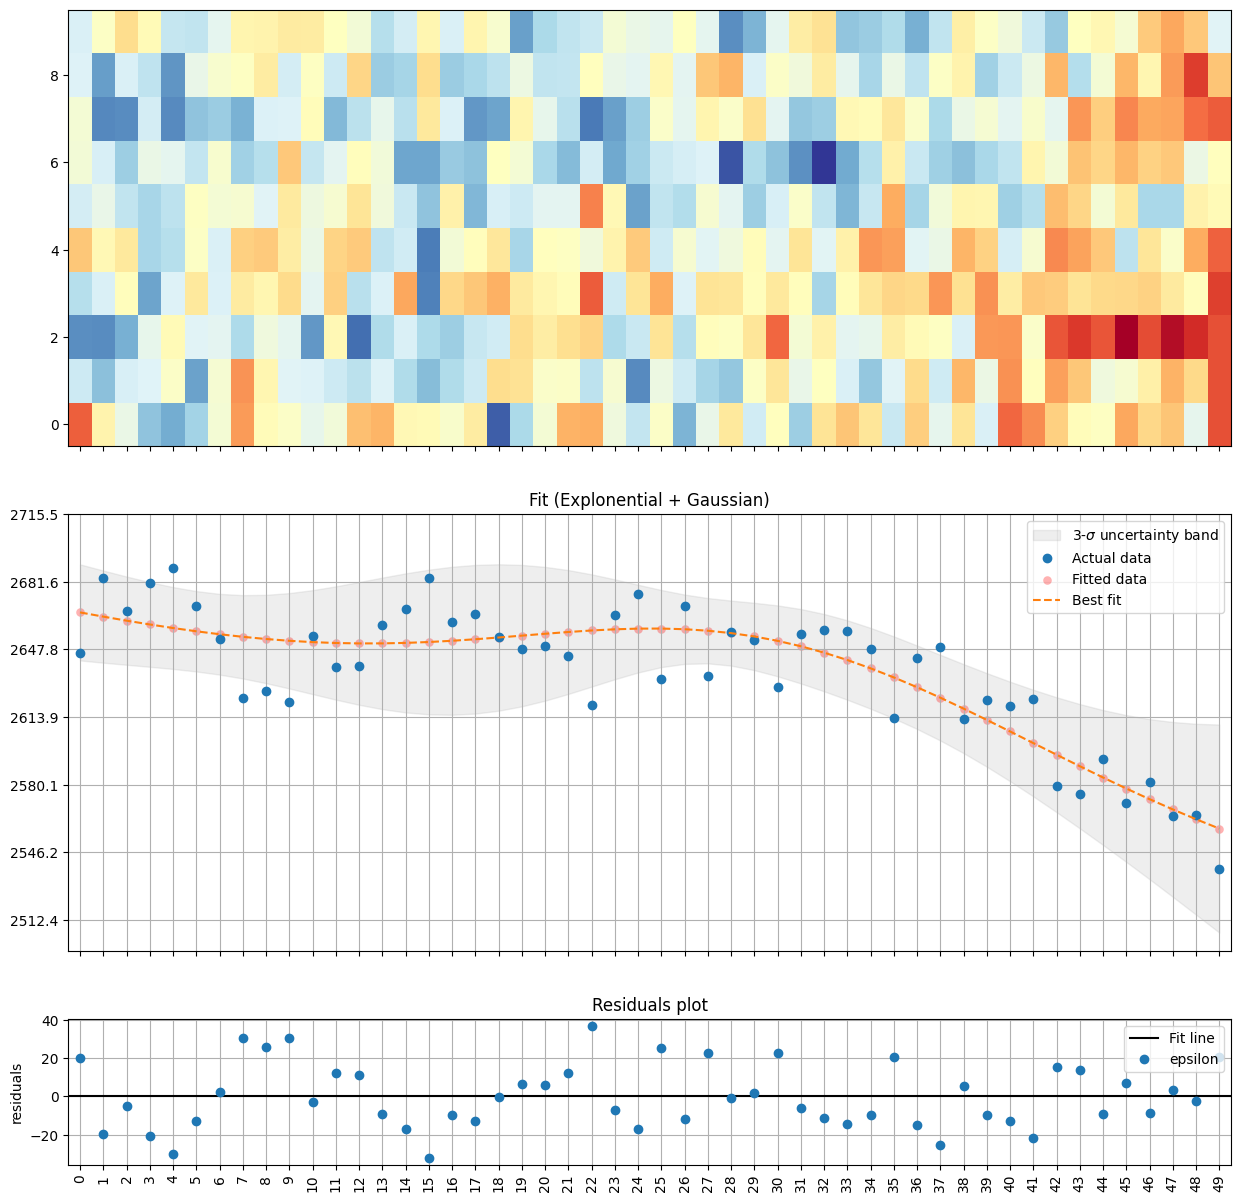

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,2664.91898,9.37838263,(0.35%),2679.462742723317,-inf,inf,True,
exp_decay,1059.56147,235.045558,(22.18%),1514.0711626636357,-inf,inf,True,
g1_amplitude,1689.34226,1008.89013,(59.72%),1.0,-inf,inf,True,
g1_center,30.0000000,2.03363183,(6.78%),25,20.0000000,30.0000000,True,
g1_sigma,10.9419408,3.42785553,(31.33%),3,2.00000000,inf,True,
g1_fwhm,25.7663011,8.07198271,(31.33%),7.06446,-inf,inf,False,2.3548200*g1_sigma
g1_height,61.5932858,18.9769759,(30.81%),0.13298076666666667,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [10]:
from lmfit.models import GaussianModel, ExponentialModel

w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=25, min=20, max=30)
pars['g1_sigma'].set(value=3, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band',
                 alpha=0.2)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend()

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'])

plt.show()

out.params